# Trends in Public Attitudes towards Abortion



Anisha Poudel, Jinwen Mu






## Summary

This study examines public opinion on the acceptability of suicide under different circumstances over the years. The data is extracted from the General Social Survey, spanning across several decades. For our examination, we focus on four distinct reasons of suicide: incurable disease (*suicide1*), bankruptcy (*suicide2*), family dishonor (suicide3), and weariness of life (*suicide4*).  The research question we have chosen is “how have attitudes towards suicide changed over the years?”. We found this important question to research since mental health is a critical concern among college students and adults. Attaining this insight might aid with improving mental health recovery. The analysis employs data cleaning, trend analysis, and statistical visualization techniques to parse out the social attitudes over the decades. The findings indicate that there is a perceived difference in public opinion for different justifications. Health related reasons were more accepted, while those based on financial or personal dishonor were less so.


## Data

The dataset for this analysis is acquired from the General Social Survey (GSS), a sociological survey collected by the National Opinion Research Center. The GSS collects data to explain trends and constants in attitudes and behavior in American Society. The specific dataset for this analysis looks at the justifiability of suicide under various circumstances over the last few decades.

For this particular analysis, key variables were selected based on their relevance to the study: How have attitudes towards suicide changed over the years? For this, we analyzed four key variables to understand if society deems it justifiable to commit suicide if they suffer from an incurable disease (*suicide1*), if they have gone bankrupt (*suicide2*), if they have dishonored their family (*suicide3*), or if they are tired if living (*suicide4*). These variables are specifically chosen for their potential to gain insight of the societal attitudes towards suicide.

 One of the main challenges working with this dataset was managing the size of it. By working with certain smaller data chunks and loading on at a time into memory, this issue was mitigated. When doing this, we had to ensure that we carefully merged the chunks together to ensure consistency and accuracy across the dataset.

Missing data led to challenges of its own, mainly due to missing values. The dataset comprised a significant amount of missing data, which was labeled ‘NaN’. The  missing data consist of different labels for non-responses such as “Don’t Know”, “No Answer”, and “Not Applicable”. The good news is that the GSS dataset already standardize these non-responses to “NaN '' for clarity and consistency.

As mentioned above, there is a about more than 50% missing values in total of four suicide variables. In addition, the variables we chose are relatively mode sensitive. Shown in the GSS 2022 codebook, '*SUICIDE1*' requires further investigation, '*SUICIDE4*' is consider as less likely to be mode sensitive, while the other 2 suicide variables have not been accessed by the GSS team at that time. Furthermore, there is no default value for these variables. And the only value for them are 'YES'(1) or 'NO'(0), so we can't impute the missing values with mean, median nor mode. According to the above information, we decide to clean all the NaNs.

Once the key variables were isolated, further data cleaning was necessary. The year variable needs to be converted from a categorical to a numerical format to maintain consistency and facilitate time trend analysis. The suicide related variables, which were initially categorical, were mapped to numerical values, 0 and 1, to simplify the calculation of response frequencies and percentage. This conversion was necessary for analysis as it focused on quantifying the public opinion regarding the justifiability of suicide.


In [27]:
# Get data set with variables we need
import pandas as pd

var_list = ['year','suicide1', 'suicide2','suicide3','suicide4'] # List of variables we need for this project
output_filename = 'gss_suicide_data.csv' # Name of the file you want to save the data to

modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [28]:
# read in the dataset
df = pd.read_csv('/content/gss_suicide_data.csv')
print(df.head()) # check if I got all the variables I want

   year suicide1 suicide2 suicide3 suicide4
0  1972      NaN      NaN      NaN      NaN
1  1972      NaN      NaN      NaN      NaN
2  1972      NaN      NaN      NaN      NaN
3  1972      NaN      NaN      NaN      NaN
4  1972      NaN      NaN      NaN      NaN


In [29]:
# check possible values in each variable for wrangling purpose
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")

Unique values in year:
['1972' '1973' '1974' '1975' '1976' '1977' '1978' '1980' '1982' '1983'
 '1984' '1985' '1986' '1987' '1988' '1989' 'year' '1990' '1991' '1993'
 '1994' '1996' '1998' '2000' '2002' '2004' '2006' '2008' '2010' '2012'
 '2014' '2016' '2018' '2021' '2022']

Unique values in suicide1:
[nan 'no' 'yes' 'suicide1']

Unique values in suicide2:
[nan 'no' 'yes' 'suicide2']

Unique values in suicide3:
[nan 'no' 'yes' 'suicide3']

Unique values in suicide4:
[nan 'no' 'yes' 'suicide4']



In [30]:
# get the value cocunt for each suicide variable
# no need to get the summary for 'year' since it has no NaNs.
summary = pd.DataFrame({
    'Variable': ['suicide1', 'suicide2', 'suicide3', 'suicide4'],
    'NaN Count': [df['suicide1'].isna().sum(), df['suicide2'].isna().sum(), df['suicide3'].isna().sum(), df['suicide4'].isna().sum()],
    'Yes Count': [df['suicide1'].eq('yes').sum(), df['suicide2'].eq('yes').sum(), df['suicide3'].eq('yes').sum(), df['suicide4'].eq('yes').sum()],
    'No Count': [df['suicide1'].eq('no').sum(), df['suicide2'].eq('no').sum(), df['suicide3'].eq('no').sum(), df['suicide4'].eq('no').sum()],
})

print(summary)

   Variable  NaN Count  Yes Count  No Count
0  suicide1      36268      20771     15351
1  suicide2      35322       3437     33631
2  suicide3      35385       3411     33594
3  suicide4      35809       6160     30421


In [31]:
# Check Vars type
print(df.dtypes)

year        object
suicide1    object
suicide2    object
suicide3    object
suicide4    object
dtype: object


In [32]:
# Convert categorical to numerical
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

yes_no_mapping = {'yes': 1, 'no': 0}
# Apply the mapping using a for loop
for col in ['suicide1', 'suicide2', 'suicide3', 'suicide4']:
    df[col] = df[col].map(yes_no_mapping)

In [33]:
print(df.dtypes)
# convert done

year          Int64
suicide1    float64
suicide2    float64
suicide3    float64
suicide4    float64
dtype: object


In [34]:
# Clean NaN
df = df.dropna(subset=['year','suicide1', 'suicide2', 'suicide3', 'suicide4'])
print(df.head())

      year  suicide1  suicide2  suicide3  suicide4
7590  1977       0.0       0.0       0.0       0.0
7591  1977       1.0       1.0       1.0       1.0
7592  1977       0.0       0.0       0.0       0.0
7593  1977       1.0       0.0       0.0       0.0
7594  1977       1.0       0.0       0.0       0.0


In [35]:
# cleaned
df.isna().sum()

year        0
suicide1    0
suicide2    0
suicide3    0
suicide4    0
dtype: int64

In [36]:
# sorted along years
df.sort_values('year')

,year,suicide1,suicide2,suicide3,suicide4
7590,1977,0.0,0.0,0.0,0.0
8616,1977,0.0,0.0,0.0,0.0
8615,1977,1.0,0.0,0.0,0.0
8614,1977,1.0,0.0,0.0,0.0
8613,1977,0.0,0.0,0.0,0.0
...,...,...,...,...,...
70036,2022,0.0,0.0,0.0,0.0
70035,2022,0.0,0.0,0.0,0.0
70033,2022,1.0,0.0,0.0,0.0
70054,2022,1.0,0.0,0.0,0.0


## Results

This analysis examines the trends and patterns in the attitudes towards suicide over the period spanning from 1977 to 2022 in America. The examination is based on the responses to four different survey questions labeled 'suicide1', 'suicide2', 'suicide3', and 'suicide4'. This data was converted from a categorical response (‘yes’, ’no’) into a numerical response (1, 0), facilitating statistical examination and visualization.


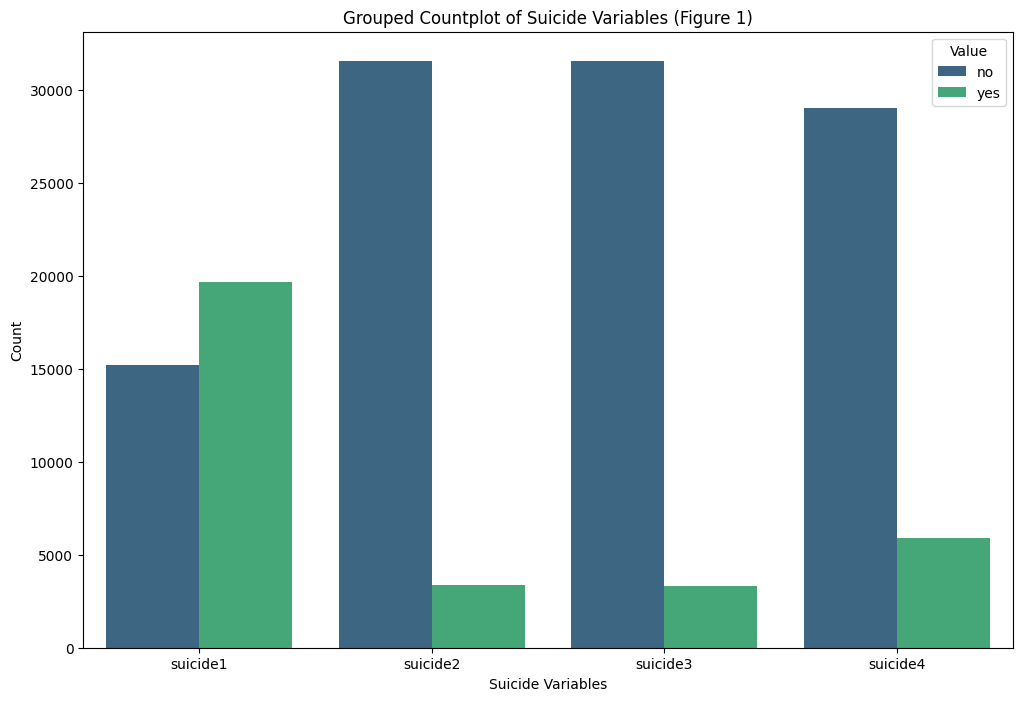

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Melt the dataframe for better visualization
df_melted = pd.melt(df, id_vars='year', value_vars=['suicide1', 'suicide2', 'suicide3', 'suicide4'], var_name='suicide_var', value_name='value')

# Create a grouped countplot
sns.countplot(x='suicide_var', hue='value', data=df_melted, palette='viridis')

plt.title('Grouped Countplot of Suicide Variables (Figure 1)')
plt.xlabel('Suicide Variables')
plt.ylabel('Count')
plt.legend(title='Value', labels=['no', 'yes'])
plt.show()


Figure 1 shows the distribution of “yes” and “no'' responses for each suicide variable. A distinct pattern can be observed where “suicide1” consistently accumulate a higher “yes” count (around 20,000) compared to theother suicide variables (lower or approximately 5,000). Additionally, it can be observed that for every other variable outside of “suicide1”, there seems to be a higher “no” count. This suggest that suicide based on health issues is more acceptable and deemed more acceptable than other reasons stated.

In [38]:
df.describe()

,year,suicide1,suicide2,suicide3,suicide4
count,34891.0,34891.000000,34891.000000,34891.000000,34891.000000
mean,1998.449371,0.563756,0.095927,0.095841,0.168553
std,13.332919,0.495926,0.294496,0.294378,0.374362
min,1977.0,0.000000,0.000000,0.000000,0.000000
25%,1986.0,0.000000,0.000000,0.000000,0.000000
50%,1998.0,1.000000,0.000000,0.000000,0.000000
75%,2010.0,1.000000,0.000000,0.000000,0.000000
max,2022.0,1.000000,1.000000,1.000000,1.000000


Table above includes the statistic for all the variables we have. Since the suicide variables and ‘year’ are categorical variables, so there is no outliers here. The summary statistics for 'year' is not usefull. The only information we need to know is our dataset contain the data from 1977 to 2022.

For suicide variables, their counts exactly the same since we cleaned all the NaNs. The mean of variable 'suicide1' is strongly greater than the other three, nearly 50% (0.5) more. And it is the only one with the mean value above 50% (0.5), means more than half of the respondents think a person has the right to end his or her own life if this person if he/she has an incurable disease. This matches the result shown in the Figure 1. Min, 25%, 50%, 75% and max statistic are also meaningless for suicide variables. Again, becuase they are categorical varibales, the only value they have are 1 for yes, and 0 for no.

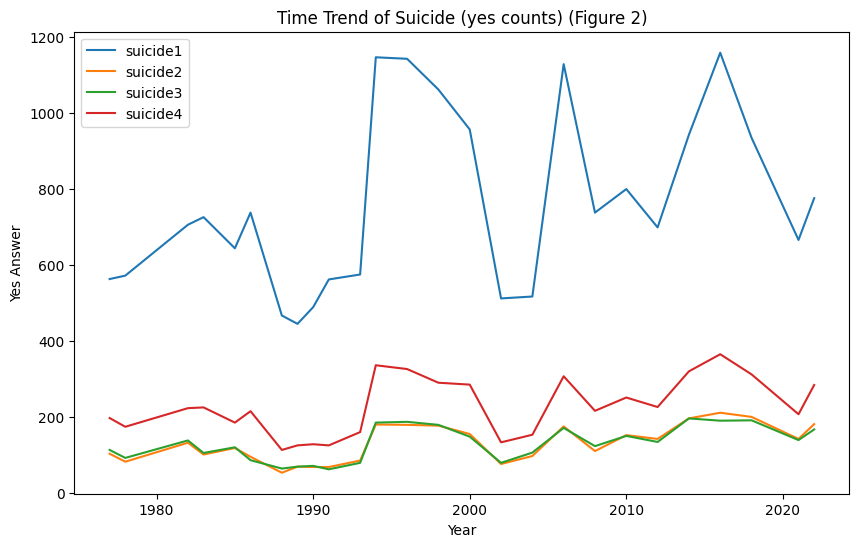

In [39]:
# Group by 'year' and calculate the sum for each vars
# Since we changed 'YES' to numeric 1, the sum for each year of each vars equals the counts of 'YES' answer.
grouped_df = df.groupby('year').sum()

# Plot the time trend graph for yes count
plt.figure(figsize=(10, 6))

for col in ['suicide1', 'suicide2', 'suicide3', 'suicide4']:
    plt.plot(grouped_df.index, grouped_df[col], label=col)

plt.xlabel('Year')
plt.ylabel('Yes Answer')
plt.title('Time Trend of Suicide (yes counts) (Figure 2)')
plt.legend()
plt.show()


Figure 2 presents a trend of “yes” counts across all four variables over the years. It is worth noting the ascending trend of “suicide1” response, indicating a shift towards a more affirmative stance. In contrast, the other variables, “suicide2”, ”suicide3”, and “suicide4”, demonstrate relative stability in “yes” counts over the years.

In [40]:
# calculate the percentage of yes/no (1/0) for each suicide variables by years
df_melted = pd.melt(df, id_vars='year', var_name='suicide_var', value_name='value')

# Calculate the percentage of counts of 0 and 1 for each suicide variable grouped by year
result_df = df_melted.groupby(['year', 'suicide_var', 'value']).size().unstack()
result_df['percent_0'] = result_df[0] / (result_df[0] + result_df[1]) * 100
result_df['percent_1'] = result_df[1] / (result_df[0] + result_df[1]) * 100

# Display the resulting DataFrame
print(result_df[['percent_0', 'percent_1']])

value             percent_0  percent_1
year suicide_var                      
1977 suicide1     61.305842  38.694158
     suicide2     92.920962   7.079038
     suicide3     92.233677   7.766323
     suicide4     86.460481  13.539519
1978 suicide1     60.875513  39.124487
...                     ...        ...
2021 suicide4     78.812692  21.187308
2022 suicide1     29.002745  70.997255
     suicide2     83.440073  16.559927
     suicide3     84.720952  15.279048
     suicide4     74.016468  25.983532

[104 rows x 2 columns]


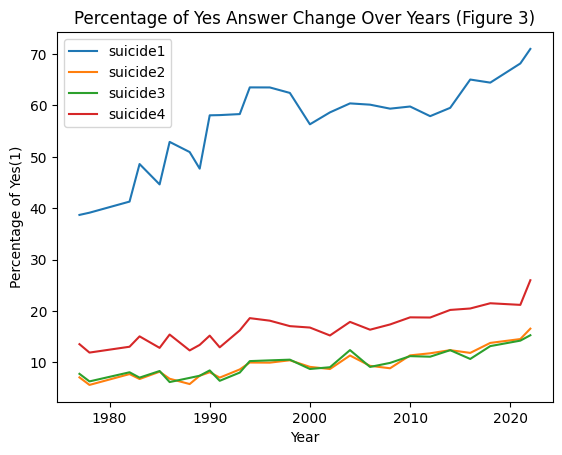

In [41]:
# @title
# fraw the time trend plot for suicide variables with percentage of yes
for var in ['suicide1', 'suicide2', 'suicide3', 'suicide4']:
    subset = result_df.loc[result_df.index.get_level_values('suicide_var') == var]
    plt.plot(subset.index.get_level_values('year'), subset['percent_1'], label=f'{var}')


plt.ylabel('Percentage of Yes(1)')
plt.xlabel('Year')
plt.title('Percentage of Yes Answer Change Over Years (Figure 3)')
plt.legend()
plt.show()

## Conclusion

This project was an extensive analysis of the societal attitudes towards suicide and justifications in various scenarios related to suicide over a 45-year span. Some criticism may arise in our analysis regarding the binary nature of a “yes” or “no” response towards suicide. On one hand, this simplifies the complex issue of suicide, but this binary approach allows for clear, digestible insight into trends over a certain period of time, servering as a valuable starting point for understanding societal change. This survey encompasses a large demographic, which stands firm against any critiques of sample size and representativeness.

While the cope of the project focuses on a numerical analysis, more areas of study is recommended to expand understanding of Americans attitude towards suicide. First can be understanding how and if public policy influences public opinion of these sensitive issues. This could be looking at healthcare practices or medial portrayal of suicide. Another way to get a better understanding of the issue is doing a qualitative analysis. This could be an in depth interview or focus groups that could provide better context behind these numerical trends observes, especially regarding the increase in affirmative responses to “suicide1”.  

Lastly, in the digital age, it is pivotal to understand the corelation between social media and the attitudes towards suicide. A dedicated study of online discourse and shifts in survey responses could be enlightening.